In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.2

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.005
        self._discount_rate = 0.9
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=1,
    epochs=10,
)

[02:41:55] Commencement of training.
[02:42:02] Completed epoch 1: 1.52488664326301
[02:42:08] Completed epoch 2: 1.5359048600930434
[02:42:14] Completed epoch 3: 1.5364493939081827
[02:42:20] Completed epoch 4: 1.5289908915849832
[02:42:26] Completed epoch 5: 1.5291619440372173
[02:42:32] Completed epoch 6: 1.530865722595117
[02:42:38] Completed epoch 7: 1.5332035864002103
[02:42:44] Completed epoch 8: 1.5332454457924916
[02:42:50] Completed epoch 9: 1.5353121911317875
[02:42:56] Completed epoch 10: 1.5354271258647625


In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 29238, <Action.DEFECT: 1>: 3262}
{<Action.COOPERATE: 0>: 0.8996307692307692, <Action.DEFECT: 1>: 0.10036923076923077}


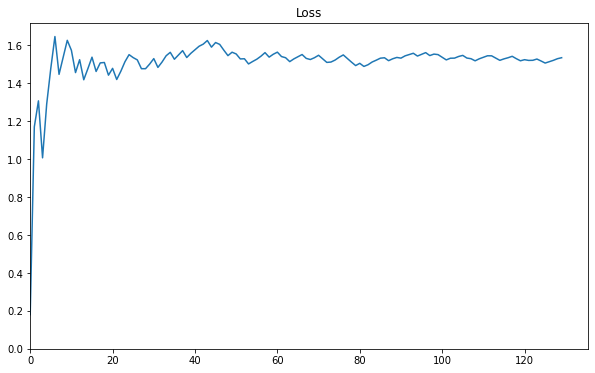

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

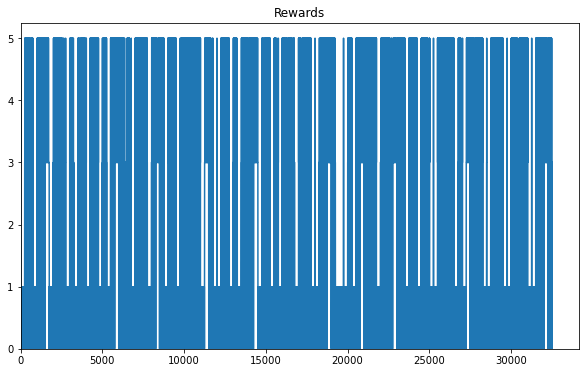

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

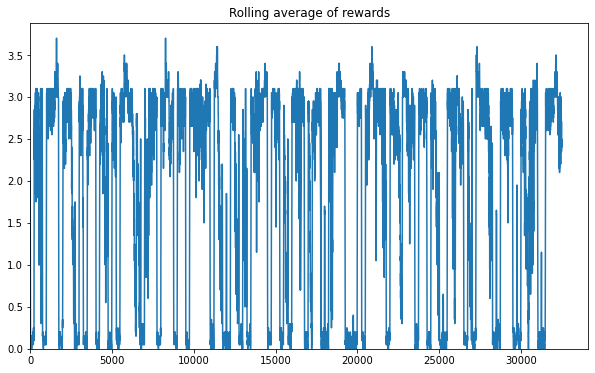

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

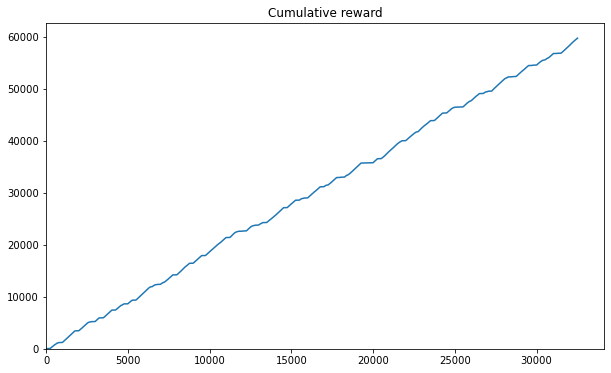

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

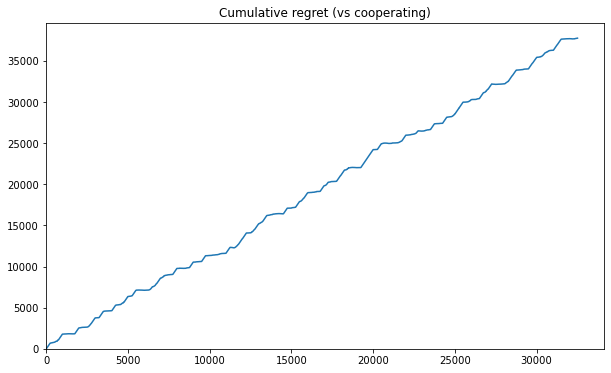

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.9, <Action.DEFECT: 1>: 0.1}, {<Action.COOPERATE: 0>: 0.9024615384615384, <Action.DEFECT: 1>: 0.09753846153846153}, {<Action.COOPERATE: 0>: 0.9003076923076923, <Action.DEFECT: 1>: 0.09969230769230769}, {<Action.COOPERATE: 0>: 0.9018461538461539, <Action.DEFECT: 1>: 0.09815384615384615}, {<Action.COOPERATE: 0>: 0.8978461538461538, <Action.DEFECT: 1>: 0.10215384615384615}, {<Action.COOPERATE: 0>: 0.9064615384615384, <Action.DEFECT: 1>: 0.09353846153846154}, {<Action.COOPERATE: 0>: 0.8975384615384615, <Action.DEFECT: 1>: 0.10246153846153847}, {<Action.COOPERATE: 0>: 0.8941538461538462, <Action.DEFECT: 1>: 0.10584615384615384}, {<Action.COOPERATE: 0>: 0.8987692307692308, <Action.DEFECT: 1>: 0.10123076923076924}, {<Action.COOPERATE: 0>: 0.8969230769230769, <Action.DEFECT: 1>: 0.10307692307692308}]


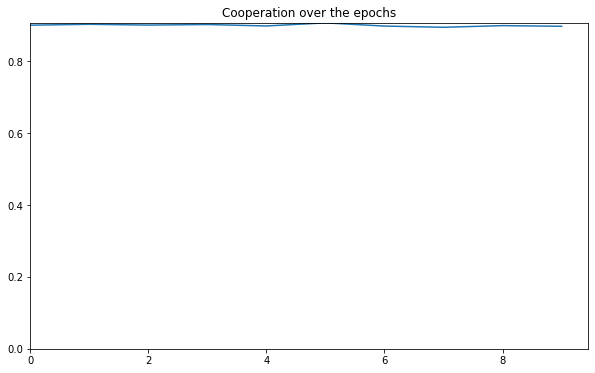

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:23<00:00, 11.47matches/s] 

Borufsen                       837                  8.602620000000003   
Grudger                        808                  6.612218            
TidemanAndChieruzzi2    806                  10.873228           
Shubik                         805                  8.107885999999999   
TitForTat                      797                  7.030707000000001   
Weiner                 793                  25.05362899999999   
Champion                       792                  37.005639           
TidemanAndChieruzzi            790                  9.272491            
TTFT                           787                  6.860407999999999   
White              787                  8.609266000000002   
GraaskampAndKatzen        782                  9.059790999999997   
SteinAndRapoport               781                  22.914074000000006  
OmegaTFT                       779                  7.951437000000001   
GradualTFT                     772                  72.40578299999999   
Grofman   